Code from Steve Brunton's video: "Image Compression and the FFT (Examples in Python)"
Link: https://www.youtube.com/watch?v=uB3v6n8t2dQ

In [37]:
from matplotlib.image import imread
import PIL
import numpy as np
import matplotlib.pyplot as plt
import os

In [38]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size': 18})
A = imread('house.jpg')
B = np.mean(A, -1);

<IPython.core.display.Javascript object>


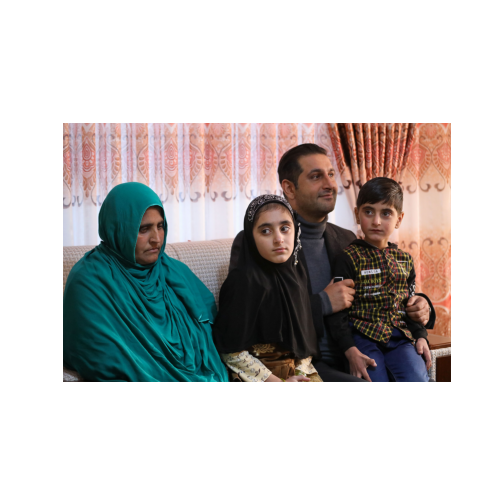

(-0.5, 2047.5, 1364.5, -0.5)

In [39]:
plt.figure()
plt.imshow(A)
plt.axis('off')

In [40]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1)))

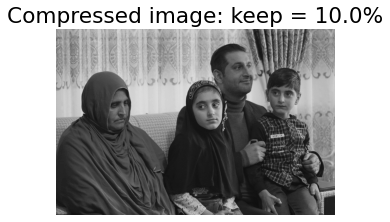

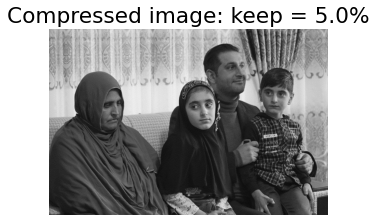

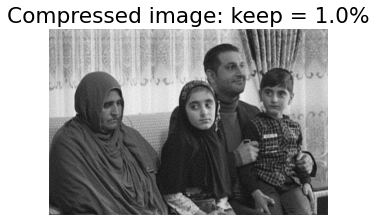

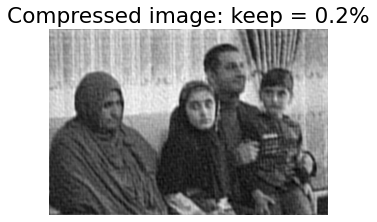

In [26]:
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh
    Atlow = Bt * ind
    Alow = np.fft.ifft2(Atlow).real
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep*100)+'%')
    

In [32]:
%matplotlib notebook

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [6,6]

<IPython.core.display.Javascript object>


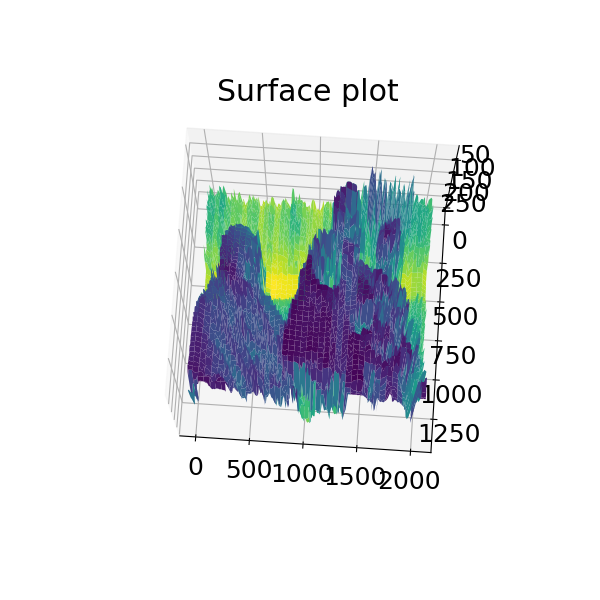

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(np.arange(1,np.shape(B)[1]+1),np.arange(1,np.shape(B)[0]+1))
ax.plot_surface(X[0::10,0::10],Y[0::10,0::10],B[0::10,0::10],cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(270,270)
plt.show()